In [27]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import LinearSVC
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
%store -r mixed_flows
# %store -r features
features = ['dstPortClassN', 'maxPktSz', 'avePktSize', 'stdPktSize', 'pktAsm',
            'bytAsm', 'ipMindIPID', 'ipMaxdIPID', 'ipMinTTL', 'ipMaxTTL', 
            'tcpSeqSntBytes', 'tcpTmS', 'tcpTmER', 'connDip', 'connSipDprt',
            'connF', 'maxIAT', 'stdIAT']

normalizer = preprocessing.Normalizer(norm="l2")
normalized_train = normalizer.fit_transform(mixed_flows[features]) #axis?
X = pd.DataFrame(normalized_train, columns = features)
y = mixed_flows.is_attack
X

,dstPortClassN,maxPktSz,avePktSize,stdPktSize,pktAsm,bytAsm,ipMindIPID,ipMaxdIPID,ipMinTTL,ipMaxTTL,tcpSeqSntBytes,tcpTmS,tcpTmER,connDip,connSipDprt,connF,maxIAT,stdIAT
0,8.229725e-04,3.432401e-06,8.084679e-07,1.116114e-06,1.287955e-09,4.572120e-09,1.674342e-08,1.674342e-08,1.071579e-06,1.071579e-06,0.000006,0.707101,0.707112,1.004605e-07,1.004605e-07,1.674342e-08,8.617838e-11,2.600472e-11
1,9.067044e-01,0.000000e+00,0.000000e+00,0.000000e+00,6.148982e-06,0.000000e+00,2.982318e-01,2.982318e-01,1.180605e-03,1.180605e-03,0.000000,0.000000,0.000000,1.844695e-05,3.689389e-05,3.689389e-05,1.259742e-07,4.453861e-08
2,2.622631e-02,8.406629e-03,1.280235e-03,2.302007e-03,-3.482448e-06,-4.234256e-05,5.920161e-05,9.995600e-01,2.190460e-03,2.190460e-03,0.010183,0.000000,0.000000,3.552097e-04,5.328145e-04,5.328145e-04,5.463310e-04,1.632547e-04
3,2.697576e-06,4.626424e-07,1.712899e-07,1.911315e-07,9.128698e-12,1.936809e-10,3.195044e-10,3.195044e-10,2.044828e-08,2.044828e-08,0.000003,0.031452,0.999505,3.195044e-10,6.390088e-10,5.809171e-11,1.665228e-10,4.165890e-11
4,3.556652e-07,1.162536e-06,3.087908e-07,4.027107e-07,1.459738e-10,3.137727e-10,8.028561e-10,8.028561e-10,5.138279e-08,5.138279e-08,0.000004,0.004960,0.999988,8.028561e-10,6.422848e-09,1.070474e-09,4.701188e-10,1.145289e-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,6.640197e-05,9.958637e-06,2.489659e-06,3.545276e-06,-1.658391e-09,5.995904e-09,8.291954e-09,7.505877e-05,5.306851e-07,5.306851e-07,0.000010,0.072834,0.997344,8.291954e-08,4.145977e-08,2.072989e-08,3.126481e-10,1.096900e-10
49996,6.000133e-01,0.000000e+00,0.000000e+00,0.000000e+00,-4.069017e-06,0.000000e+00,7.999893e-01,0.000000e+00,7.812514e-04,7.812514e-04,0.000000,0.000000,0.000000,1.220705e-05,1.220705e-05,4.069017e-06,0.000000e+00,0.000000e+00
49997,1.075980e-01,0.000000e+00,0.000000e+00,0.000000e+00,4.478769e-06,0.000000e+00,7.030011e-01,7.030011e-01,8.599238e-04,8.599238e-04,0.000000,0.000000,0.000000,1.343631e-05,2.687262e-05,1.343631e-05,1.148804e-08,4.061638e-09
49998,2.551698e-05,8.340538e-05,6.892850e-06,1.365907e-05,1.371438e-08,-1.693156e-08,5.760040e-08,5.760040e-08,3.686426e-06,3.686426e-06,0.000269,0.998229,0.059492,5.760040e-08,4.032028e-07,1.008007e-07,1.716955e-06,7.639726e-07


              precision    recall  f1-score   support

      benign       0.85      0.96      0.90      8207
      attack       0.96      0.83      0.89      8293

    accuracy                           0.90     16500
   macro avg       0.90      0.90      0.90     16500
weighted avg       0.90      0.90      0.90     16500



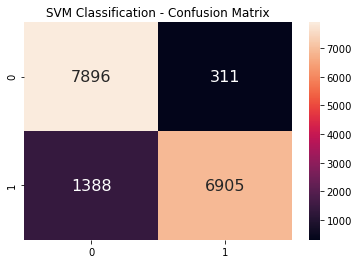

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.33, random_state = 1)

classifier = LinearSVC(random_state = 0)
classifier.fit(X_train, Y_train)
Y_test_prediction = classifier.predict(X_test)
conf_matrix = confusion_matrix(Y_test, Y_test_prediction)
plt.figure()
sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 16}, fmt='g')
plt.title('SVM Classification - Confusion Matrix')
print(classification_report(Y_test, Y_test_prediction, target_names=["benign", "attack"]))